In [2]:
import os
import numpy as np
import nibabel as nib
import SimpleITK as sitk
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
brain_path = '/media/student/HDD 1/MDS22/demo_sub_ses/sub-022/ses-20101011/anat/sub-022_ses-20101011_angio.nii.gz'
output_path = '/home/student/Documents/MDS22/Aneurysm_Detection_dev/streamlit_app/outputs/run_Apr_25_2024_16h58m/sub-022/ses-20101011'

In [70]:
gt_path = "/media/student/HDD 1/MDS22/dataset/derivatives/manual_masks/sub-022/ses-20101011/anat/sub-022_ses-20101011_desc-Lesion_1_mask.nii.gz"
gt = nib.load(gt_path).get_fdata()

In [4]:
brain = nib.load(brain_path).get_fdata()

heatmaps = []
for item in os.listdir(output_path):
    if item.startswith('xai'):
        heatmaps.append(nib.load(os.path.join(output_path, item)).get_fdata())

In [5]:
brain.shape

(512, 512, 140)

In [6]:
heatmaps[0].shape

(64, 64, 64)

In [9]:
coords = [
    [192, 224, 96],
    [224, 352, 96],
    [320, 96, 32],
    [320, 224, 96],
    [352, 224, 96]
]

In [11]:
# Create an empty array to hold the overlaid image
overlaid_image = np.zeros(brain.shape)

# Iterate over the list of coordinates
for coordinate, heatmap in zip(coords, heatmaps):
    # Extract the coordinates
    x, y, z = coordinate
    
    # Extract the patch from the TOF-MRA image
    patch = brain[x-32:x+32, y-32:y+32, z-32:z+32]
    
    # Overlay the heatmap onto the patch (example: adding the heatmap values to the patch)
    overlaid_patch = patch + heatmap
    
    # Place the overlaid patch back into the empty array at the correct position
    overlaid_image[x-32:x+32, y-32:y+32, z-32:z+32] = overlaid_patch

# Save the overlaid image as a new NIfTI file
overlaid_image_nifti = nib.Nifti1Image(overlaid_image, affine=None)
nib.save(overlaid_image_nifti, 'overlaid_image.nii.gz')

In [6]:
overlaid = nib.load('overlaid_image.nii.gz').get_fdata()

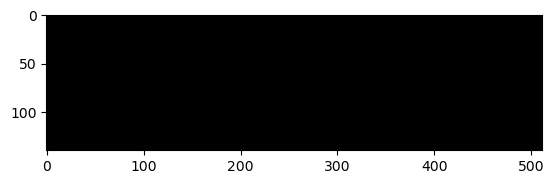

In [71]:
plt.imshow(Image.fromarray(gt[:, 222, :]).transpose(Image.ROTATE_90))

In [18]:
slice = Image.fromarray(overlaid[310, :, :]).transpose(Image.ROTATE_90)

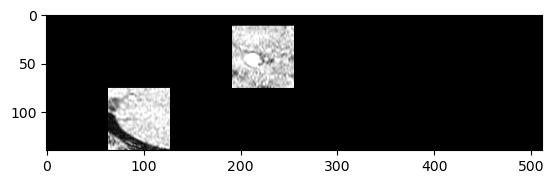

In [19]:
plt.imshow(slice)

In [11]:
unet_patch_side = 64

overlay = np.zeros(brain.shape)
counter = np.zeros(brain.shape)

for coord, heatmap in zip(coords, heatmaps):
    # Extract the coordinates
    x, y, z = coord
    
    start_x, end_x = max(0, x - unet_patch_side // 2), min(overlay.shape[0], x + unet_patch_side // 2)
    start_y, end_y = max(0, y - unet_patch_side // 2), min(overlay.shape[1], y + unet_patch_side // 2)
    start_z, end_z = max(0, z - unet_patch_side // 2), min(overlay.shape[2], z + unet_patch_side // 2)

    overlay[start_x:end_x, start_y:end_y, start_z:end_z] += heatmap
    counter[start_x:end_x, start_y:end_y, start_z:end_z] += 1

overlay /= np.maximum(counter, 1)

In [65]:
type(brain.shape)

tuple

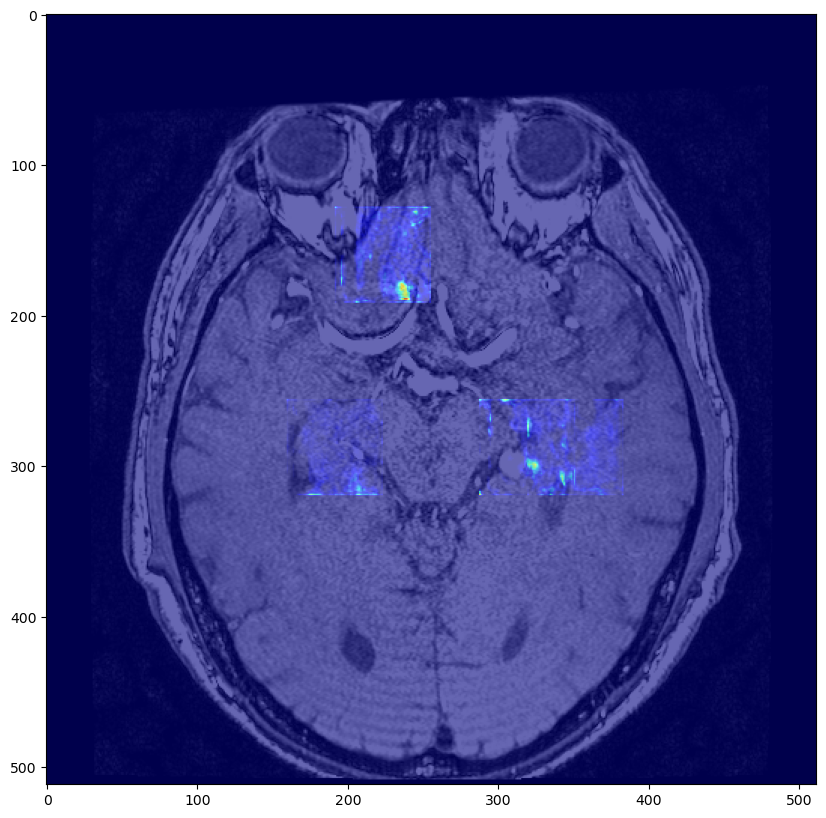

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.imshow(Image.fromarray(brain[:, :, 94]).transpose(Image.ROTATE_90), cmap='gray')
# axes.imshow(overlay[:, :, 94], cmap='jet', alpha=0.3)
axes.imshow(np.ma.masked_where(Image.fromarray(overlay[:, :, 94]).transpose(Image.ROTATE_90) == 0, Image.fromarray(overlay[:, :, 94]).transpose(Image.ROTATE_90)), cmap='jet', alpha=0.6)

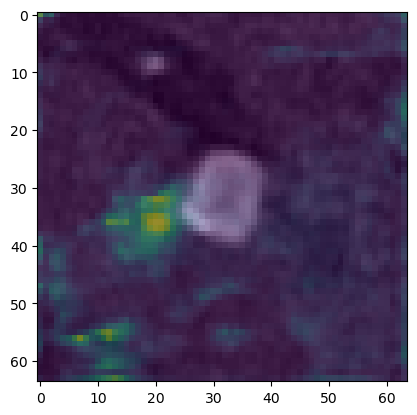

In [14]:
x, y, z = 310, 213, 94
plt.imshow(brain[x-32:x+32, y-32:y+32, z-32:z+32][:, :, 32], cmap='gray')
plt.imshow(heatmaps[3][:, :, 32], alpha=0.5, cmap='viridis')

In [82]:
import pickle
from pprint import pprint

all_test = []

# Specify the path to your pickle file
pkl_file_path_1 = '/home/student/Documents/MDS22/Aneurysm_Detection_dev/fixed_pickles/Train_Outputs_Aug_16_2021_chuv_weak_plus_voxelwise_pretrain_adam_github/fold1/test_subs/test_sub_ses.pkl'
pkl_file_path_2 = '/home/student/Documents/MDS22/Aneurysm_Detection_dev/fixed_pickles/Train_Outputs_Aug_16_2021_chuv_weak_plus_voxelwise_pretrain_adam_github/fold2/test_subs/test_sub_ses.pkl'
pkl_file_path_3 = '/home/student/Documents/MDS22/Aneurysm_Detection_dev/fixed_pickles/Train_Outputs_Aug_16_2021_chuv_weak_plus_voxelwise_pretrain_adam_github/fold3/test_subs/test_sub_ses.pkl'
pkl_file_path_4 = '/home/student/Documents/MDS22/Aneurysm_Detection_dev/fixed_pickles/Train_Outputs_Aug_16_2021_chuv_weak_plus_voxelwise_pretrain_adam_github/fold4/test_subs/test_sub_ses.pkl'
pkl_file_path_5 = '/home/student/Documents/MDS22/Aneurysm_Detection_dev/fixed_pickles/Train_Outputs_Aug_16_2021_chuv_weak_plus_voxelwise_pretrain_adam_github/fold5/test_subs/test_sub_ses.pkl'

pkl_file_paths = [pkl_file_path_1, pkl_file_path_2, pkl_file_path_3, pkl_file_path_4, pkl_file_path_5]

# Open the pickle file for reading in binary mode
for pkl_file_path in pkl_file_paths:
    with open(pkl_file_path, 'rb') as f:
        # Load the data from the pickle file
        data = pickle.load(f)
        all_test += data

# Now, 'data' contains the list that was stored in the pickle file
# pprint(sorted(data))

In [97]:
with open(pkl_file_path_5, 'rb') as f:
    # Load the data from the pickle file
    data = pickle.load(f)
    pprint(sorted(data))

['sub-006_ses-20101217',
 'sub-007_ses-20101225',
 'sub-015_ses-20101111',
 'sub-036_ses-20101030',
 'sub-078_ses-20100430',
 'sub-081_ses-20100406',
 'sub-106_ses-20100301',
 'sub-125_ses-20100129',
 'sub-128_ses-20120124',
 'sub-129_ses-20120107',
 'sub-132_ses-20111218',
 'sub-134_ses-20111127',
 'sub-141_ses-20111229',
 'sub-144_ses-20111211',
 'sub-162_ses-20111102',
 'sub-179_ses-20111101',
 'sub-187_ses-20111023',
 'sub-191_ses-20111010',
 'sub-207_ses-20110729',
 'sub-215_ses-20110721',
 'sub-224_ses-20110802',
 'sub-239_ses-20110628',
 'sub-246_ses-20110622',
 'sub-250_ses-20110525',
 'sub-253_ses-20110628',
 'sub-263_ses-20110611',
 'sub-265_ses-20110507',
 'sub-270_ses-20110522',
 'sub-274_ses-20110609',
 'sub-289_ses-20110420',
 'sub-293_ses-20110407',
 'sub-295_ses-20110505',
 'sub-318_ses-20110202',
 'sub-331_ses-20110121',
 'sub-344_ses-20121218',
 'sub-349_ses-20121111',
 'sub-350_ses-20121217',
 'sub-354_ses-20121111',
 'sub-401_ses-20140127',
 'sub-402_ses-20140111',


In [83]:
pprint(sorted(all_test))

['sub-000_ses-20110101',
 'sub-001_ses-20101222',
 'sub-002_ses-20110127',
 'sub-005_ses-20101215',
 'sub-006_ses-20101217',
 'sub-007_ses-20101225',
 'sub-013_ses-20101220',
 'sub-015_ses-20101111',
 'sub-021_ses-20101111',
 'sub-022_ses-20101011',
 'sub-026_ses-20101106',
 'sub-030_ses-20101012',
 'sub-033_ses-20101021',
 'sub-034_ses-20101005',
 'sub-035_ses-20101019',
 'sub-036_ses-20101030',
 'sub-037_ses-20100921',
 'sub-039_ses-20101028',
 'sub-043_ses-20101007',
 'sub-045_ses-20101006',
 'sub-047_ses-20100908',
 'sub-051_ses-20100920',
 'sub-052_ses-20100920',
 'sub-053_ses-20100808',
 'sub-062_ses-20100601',
 'sub-065_ses-20100703',
 'sub-066_ses-20100526',
 'sub-069_ses-20100513',
 'sub-073_ses-20100426',
 'sub-074_ses-20100421',
 'sub-074_ses-20101117',
 'sub-075_ses-20100502',
 'sub-076_ses-20100506',
 'sub-077_ses-20100414',
 'sub-078_ses-20100430',
 'sub-079_ses-20100502',
 'sub-081_ses-20100406',
 'sub-091_ses-20100405',
 'sub-092_ses-20100313',
 'sub-099_ses-20100321',


In [85]:
all_sub_ses = []
ds_path = '/media/student/HDD 1/MDS22/dataset'
for sub in os.listdir(ds_path):
    if sub.startswith('sub'):
        for ses in os.listdir(os.path.join(ds_path, sub)):
            all_sub_ses.append(f'{sub}_{ses}')

In [89]:
set(all_sub_ses) - set(all_test)

{'sub-170_ses-20100422',
 'sub-170_ses-20111112',
 'sub-225_ses-20100515',
 'sub-225_ses-20110617',
 'sub-234_ses-20110613',
 'sub-234_ses-20111203',
 'sub-315_ses-20100817',
 'sub-315_ses-20110320',
 'sub-325_ses-20100414',
 'sub-325_ses-20110127',
 'sub-327_ses-20101207',
 'sub-327_ses-20110124',
 'sub-327_ses-20110923',
 'sub-329_ses-20110126',
 'sub-329_ses-20110823',
 'sub-450_ses-20141125',
 'sub-451_ses-20141129',
 'sub-452_ses-20141127',
 'sub-453_ses-20141021',
 'sub-454_ses-20141123',
 'sub-455_ses-20141113',
 'sub-457_ses-20140823',
 'sub-458_ses-20140915',
 'sub-459_ses-20140829',
 'sub-460_ses-20140812',
 'sub-461_ses-20140802',
 'sub-462_ses-20140902',
 'sub-464_ses-20140724',
 'sub-465_ses-20140729',
 'sub-466_ses-20140901',
 'sub-467_ses-20140817',
 'sub-469_ses-20140705',
 'sub-470_ses-20140807',
 'sub-471_ses-20140712',
 'sub-472_ses-20140705',
 'sub-473_ses-20140701',
 'sub-474_ses-20140630',
 'sub-475_ses-20140503',
 'sub-476_ses-20140519',
 'sub-478_ses-20140513',


In [92]:
len(set(all_sub_ses) - set(all_test))

53